In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv("train_data.csv")

In [3]:
train.head(10)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827
5,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-08-04,0.945964,0.001746,0.007863,1.005006,0.004220,0.110946,0.009857,0.009866,...,NaN,NaN,NaN,0.001924,0.008598,0.004529,NaN,0.000674,0.002223,0.002884
6,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-09-18,0.940705,0.002183,0.018859,1.008024,0.004509,0.103329,0.006603,0.000783,...,NaN,NaN,NaN,0.001336,0.004361,0.009387,NaN,0.007727,0.007661,0.002225
7,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-10-08,0.914767,0.003029,0.014324,1.000242,0.000263,0.108115,0.009527,0.007836,...,NaN,NaN,NaN,0.002397,0.008452,0.005553,NaN,0.001831,0.009616,0.007385
8,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-11-20,0.950845,0.009896,0.016888,1.003995,0.001789,0.102792,0.002519,0.009817,...,NaN,NaN,NaN,0.009742,0.003968,0.007945,NaN,0.008722,0.004369,0.000995
9,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-12-04,0.868580,0.001082,0.001930,1.007504,0.001772,0.100470,0.004626,0.006073,...,NaN,NaN,NaN,0.003611,0.009607,0.007266,NaN,0.008763,0.004753,0.009068


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Columns: 190 entries, customer_ID to D_145
dtypes: float64(185), int64(1), object(4)
memory usage: 7.8+ GB


5531451

In [5]:
# Check percentage of missing values in each column
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})

In [6]:
missing_value_df.sort_values(by=['percent_missing'],ascending=False)[:40]

,column_name,percent_missing
D_87,D_87,99.930127
D_88,D_88,99.891457
D_108,D_108,99.476846
D_111,D_111,99.433530
D_110,D_110,99.433530
B_39,B_39,99.391986
D_73,D_73,98.990211
B_42,B_42,98.707789
D_134,D_134,96.480146
D_135,D_135,96.480146


In [7]:
# Drop columns where the number of missing values are greater than 80%
cols_to_drop=missing_value_df[missing_value_df['percent_missing']>80].index
cols_to_drop

Index(['D_42', 'D_49', 'D_66', 'D_73', 'D_76', 'R_9', 'B_29', 'D_87', 'D_88',
       'D_106', 'R_26', 'D_108', 'D_110', 'D_111', 'B_39', 'B_42', 'D_132',
       'D_134', 'D_135', 'D_136', 'D_137', 'D_138', 'D_142'],
      dtype='object')

In [8]:
train_df=train.drop(cols_to_drop,axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Columns: 167 entries, customer_ID to D_145
dtypes: float64(162), int64(1), object(4)
memory usage: 6.9+ GB


In [9]:
train_labels=pd.read_csv("train_labels.csv")
train_labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [10]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_ID  458913 non-null  object
 1   target       458913 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


In [11]:
# Grouping with customer_ID and using last transaction
train_df=train_df.groupby('customer_ID').tail(1)# tail gives the last entry
train_df.reset_index(drop=True,inplace=True)

In [12]:
#Append target variable to train dataset 
train_df['target']=train_labels.target

In [13]:
train_df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-03-13,0.934745,0.009119,0.009382,1.007647,0.006104,0.135021,0.001604,0.007174,...,0.005702,0.006210,0.002715,0.007186,0.004234,0.005086,0.005810,0.002970,0.008533,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-03-25,0.880519,0.178126,0.034684,1.004028,0.006911,0.165509,0.005552,0.005068,...,0.001928,0.002996,0.001701,0.002980,0.007479,0.007870,0.003284,0.003169,0.008514,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2018-03-12,0.880875,0.009704,0.004284,0.812650,0.006450,NaN,0.003796,0.007196,...,0.003470,0.009881,0.007691,0.007383,0.006623,0.000964,0.002202,0.000834,0.003444,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2018-03-29,0.621776,0.001083,0.012564,1.006183,0.007829,0.287766,0.004532,0.009937,...,0.004576,0.001789,0.005140,0.002704,0.006184,0.001899,0.008183,0.005560,0.002983,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,2018-03-30,0.871900,0.005573,0.007679,0.815746,0.001247,NaN,0.000231,0.005528,...,0.008897,0.005045,0.003706,0.002974,0.004162,0.005764,0.008154,0.006944,0.000905,0


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Columns: 168 entries, customer_ID to target
dtypes: float64(162), int64(2), object(4)
memory usage: 588.2+ MB


In [15]:
#Distribution of the target variable
train_df['target'].value_counts()

0    340085
1    118828
Name: target, dtype: int64

In [16]:
# lets find correlation of each variable with the target variable
corr_train=train_df.corr()
corr_train['target'].sort_values(ascending=False)

target    1.000000
D_48      0.612357
D_55      0.540676
B_9       0.540561
D_61      0.534536
            ...   
D_62     -0.368869
B_33     -0.520651
B_18     -0.546277
B_2      -0.557697
P_2      -0.667293
Name: target, Length: 164, dtype: float64

In [17]:
train_df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-03-13,0.934745,0.009119,0.009382,1.007647,0.006104,0.135021,0.001604,0.007174,...,0.005702,0.006210,0.002715,0.007186,0.004234,0.005086,0.005810,0.002970,0.008533,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-03-25,0.880519,0.178126,0.034684,1.004028,0.006911,0.165509,0.005552,0.005068,...,0.001928,0.002996,0.001701,0.002980,0.007479,0.007870,0.003284,0.003169,0.008514,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2018-03-12,0.880875,0.009704,0.004284,0.812650,0.006450,NaN,0.003796,0.007196,...,0.003470,0.009881,0.007691,0.007383,0.006623,0.000964,0.002202,0.000834,0.003444,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2018-03-29,0.621776,0.001083,0.012564,1.006183,0.007829,0.287766,0.004532,0.009937,...,0.004576,0.001789,0.005140,0.002704,0.006184,0.001899,0.008183,0.005560,0.002983,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,2018-03-30,0.871900,0.005573,0.007679,0.815746,0.001247,NaN,0.000231,0.005528,...,0.008897,0.005045,0.003706,0.002974,0.004162,0.005764,0.008154,0.006944,0.000905,0


In [18]:
df=train_df.drop(['customer_ID','S_2','D_63','D_64'],axis=1)# dropping the Object columns

In [19]:
df=df.drop(df.columns[df.corrwith(df['target']).abs()<0.3],axis=1)

In [20]:
df.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_44,B_4,...,D_74,D_75,D_77,D_78,B_30,B_33,B_37,B_38,D_112,target
0,0.934745,0.009119,0.009382,1.007647,0.006104,0.135021,0.001604,0.007174,0.003258,0.070793,...,0.001298,0.001352,0.421334,0.000747,0.0,1.007528,0.008676,2.0,1.009372,0
1,0.880519,0.178126,0.034684,1.004028,0.006911,0.165509,0.005552,0.005068,0.008781,0.020626,...,0.007925,0.009600,0.227755,0.001542,0.0,1.000766,0.032899,2.0,1.006547,0
2,0.880875,0.009704,0.004284,0.812650,0.006450,NaN,0.003796,0.007196,0.000628,0.031044,...,0.002067,0.003329,0.407122,0.002990,0.0,1.000779,0.004723,1.0,1.007076,0
3,0.621776,0.001083,0.012564,1.006183,0.007829,0.287766,0.004532,0.009937,0.007792,0.007235,...,0.004011,0.005505,0.401139,0.007304,0.0,1.009480,0.007375,2.0,1.003711,0
4,0.871900,0.005573,0.007679,0.815746,0.001247,NaN,0.000231,0.005528,0.002436,0.269407,...,0.144073,0.142552,0.392566,0.007474,0.0,1.007604,0.007787,1.0,1.008149,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Data columns (total 42 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   P_2     455944 non-null  float64
 1   D_39    458913 non-null  float64
 2   B_1     458913 non-null  float64
 3   B_2     458882 non-null  float64
 4   R_1     458913 non-null  float64
 5   S_3     373943 non-null  float64
 6   D_41    458882 non-null  float64
 7   B_3     458882 non-null  float64
 8   D_44    436618 non-null  float64
 9   B_4     458913 non-null  float64
 10  R_2     458913 non-null  float64
 11  D_48    400921 non-null  float64
 12  B_7     458913 non-null  float64
 13  B_8     454822 non-null  float64
 14  B_9     458913 non-null  float64
 15  P_3     436693 non-null  float64
 16  D_53    132981 non-null  float64
 17  B_11    458913 non-null  float64
 18  R_4     458913 non-null  float64
 19  S_7     373943 non-null  float64
 20  D_55    428536 non-null  float64
 21  D_58    45

In [22]:
#adding the object we dropped earlier
df['D_63']=train_df['D_63']
df['D_64']=train_df['D_64']

In [23]:
df.select_dtypes(include=['object'])

,D_63,D_64
0,CR,O
1,CO,O
2,CO,R
3,CO,O
4,CO,O
...,...,...
458908,CO,U
458909,CO,R
458910,CO,U
458911,CO,U


In [24]:
#Checking for null values in new train data
df.isnull().sum()

P_2         2969
D_39           0
B_1            0
B_2           31
R_1            0
S_3        84970
D_41          31
B_3           31
D_44       22295
B_4            0
R_2            0
D_48       57992
B_7            0
B_8         4091
B_9            0
P_3        22220
D_53      325932
B_11           0
R_4            0
S_7        84970
D_55       30377
D_58           0
D_61       48348
D_62       58953
B_16          31
B_17      244471
B_18           0
B_19          31
B_20          31
B_22          31
D_70        4196
B_23           0
D_74        1701
D_75           0
D_77      213837
D_78       22295
B_30          31
B_33          31
B_37           0
B_38          31
D_112         31
target         0
D_63           0
D_64       10037
dtype: int64

In [25]:
df.drop(['S_3','D_53','B_17','D_77'],axis=1,inplace=True)

In [26]:
#['B_30', 'B_38', 'D_63', 'D_64'] -Categorical variables
cat_var=['B_30', 'B_38', 'D_63', 'D_64']
num_var=[x for x in df.columns if x not in cat_var]
num_var

['P_2',
 'D_39',
 'B_1',
 'B_2',
 'R_1',
 'D_41',
 'B_3',
 'D_44',
 'B_4',
 'R_2',
 'D_48',
 'B_7',
 'B_8',
 'B_9',
 'P_3',
 'B_11',
 'R_4',
 'S_7',
 'D_55',
 'D_58',
 'D_61',
 'D_62',
 'B_16',
 'B_18',
 'B_19',
 'B_20',
 'B_22',
 'D_70',
 'B_23',
 'D_74',
 'D_75',
 'D_78',
 'B_33',
 'B_37',
 'D_112',
 'target']

In [27]:

#Handling missing values for numerical varialbe with mean
df[num_var]=df[num_var].fillna(df[num_var].mean())

In [28]:
df.isnull().sum()

P_2           0
D_39          0
B_1           0
B_2           0
R_1           0
D_41          0
B_3           0
D_44          0
B_4           0
R_2           0
D_48          0
B_7           0
B_8           0
B_9           0
P_3           0
B_11          0
R_4           0
S_7           0
D_55          0
D_58          0
D_61          0
D_62          0
B_16          0
B_18          0
B_19          0
B_20          0
B_22          0
D_70          0
B_23          0
D_74          0
D_75          0
D_78          0
B_30         31
B_33          0
B_37          0
B_38         31
D_112         0
target        0
D_63          0
D_64      10037
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
# Encode object categorical variables
df['D_63'] = df['D_63'].astype('category')
df['D_64'] = df['D_64'].astype('category')
df = pd.get_dummies(df)

In [31]:
df.head()

,P_2,D_39,B_1,B_2,R_1,D_41,B_3,D_44,B_4,R_2,...,target,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_O,D_64_R,D_64_U
0,0.934745,0.009119,0.009382,1.007647,0.006104,0.001604,0.007174,0.003258,0.070793,0.008309,...,0,0,0,1,0,0,0,1,0,0
1,0.880519,0.178126,0.034684,1.004028,0.006911,0.005552,0.005068,0.008781,0.020626,0.004976,...,0,0,1,0,0,0,0,1,0,0
2,0.880875,0.009704,0.004284,0.812650,0.006450,0.003796,0.007196,0.000628,0.031044,0.001687,...,0,0,1,0,0,0,0,0,1,0
3,0.621776,0.001083,0.012564,1.006183,0.007829,0.004532,0.009937,0.007792,0.007235,0.004238,...,0,0,1,0,0,0,0,1,0,0
4,0.871900,0.005573,0.007679,0.815746,0.001247,0.000231,0.005528,0.002436,0.269407,0.001991,...,0,0,1,0,0,0,0,1,0,0


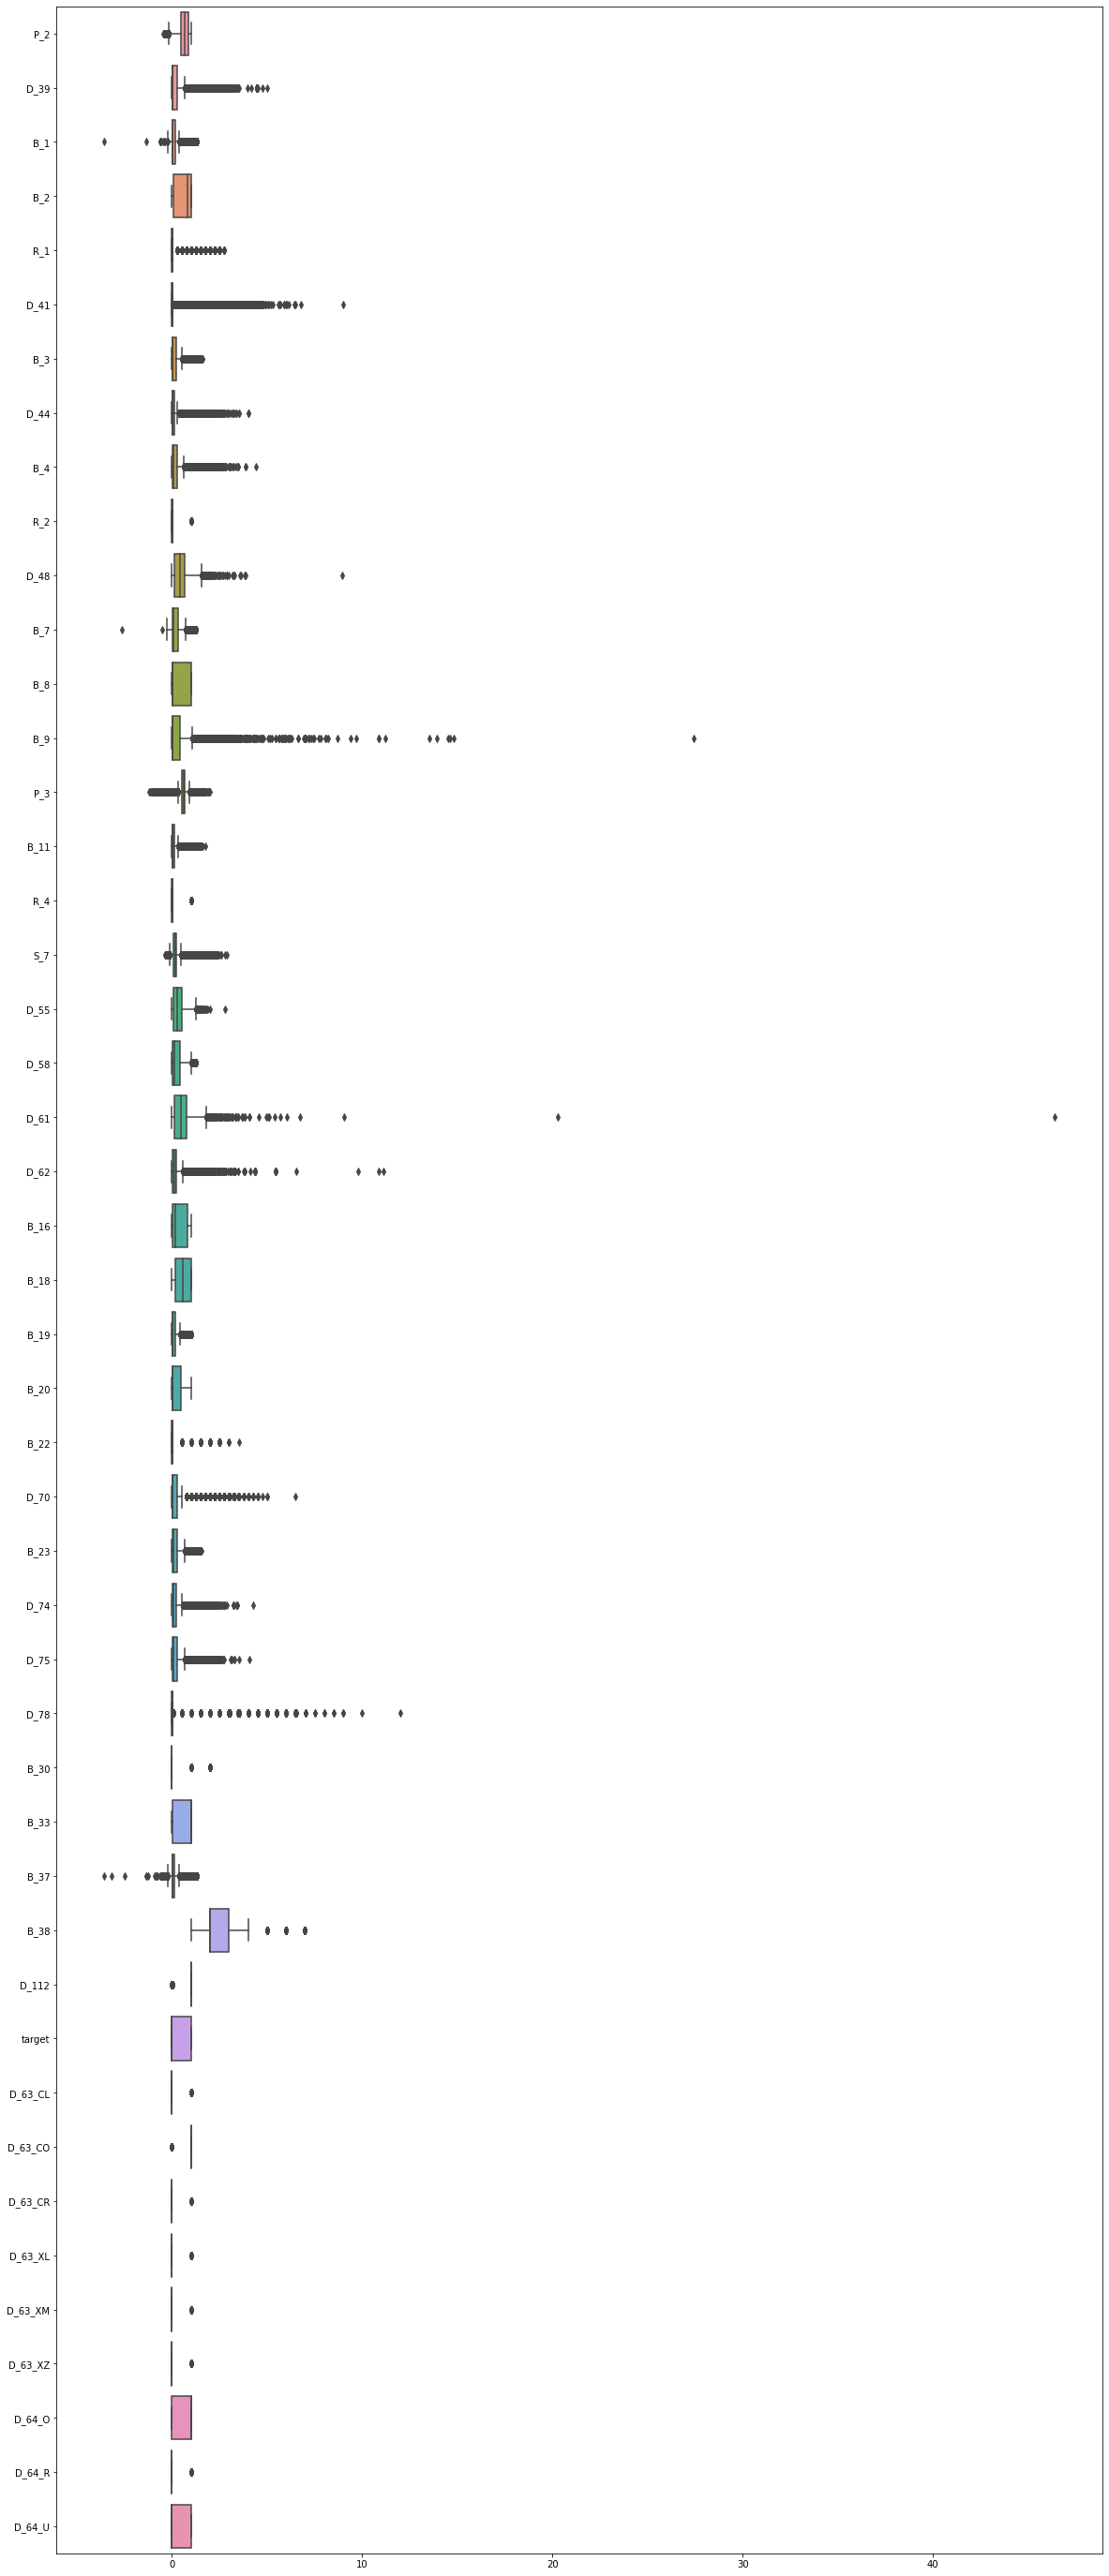

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,50)
sns.boxplot(data=df,orient="h")
plt.show()

In [ ]:
# From plot we can undertand that there are lot of outliers in columns D_41,D_44, B_4,B_9,B_37,D_78,D_74,S_7

In [33]:
# D_41 ,D_78 , S_7 amongst the one with outliers has less correlation with the target 
df['D_78'].corr(df['target'])

0.3431498963992505

In [34]:
# Let's drop those columns
df.drop(['D_41','D_78','S_7'],axis=1,inplace=True)

In [35]:
# Trying to understand if we need to normalize or standardize all features
df.describe()

,P_2,D_39,B_1,B_2,R_1,B_3,D_44,B_4,R_2,D_48,...,target,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_O,D_64_R,D_64_U
count,448875.000000,4.488750e+05,448875.000000,4.488750e+05,4.488750e+05,4.488750e+05,4.488750e+05,4.488750e+05,4.488750e+05,448875.000000,...,448875.000000,448875.000000,448875.000000,448875.000000,448875.000000,448875.000000,448875.000000,448875.000000,448875.000000,448875.000000
mean,0.636319,2.027454e-01,0.138759,5.901187e-01,1.080965e-01,1.565854e-01,1.391949e-01,1.904789e-01,8.261063e-02,0.408336,...,0.258123,0.077696,0.751775,0.158378,0.001791,0.003208,0.007151,0.544965,0.159358,0.295677
std,0.267712,4.031478e-01,0.230963,4.130970e-01,2.797522e-01,2.561097e-01,2.423550e-01,2.415726e-01,2.675745e-01,0.321893,...,0.437603,0.267694,0.431984,0.365096,0.042284,0.056549,0.084262,0.497975,0.366010,0.456347
min,-0.458955,7.406592e-08,-3.571172,2.024839e-07,5.646122e-08,7.574315e-08,1.031370e-08,1.999710e-07,1.879546e-08,-0.009603,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.450875,4.799136e-03,0.008949,6.995671e-02,2.959887e-03,5.529710e-03,4.186954e-03,2.962540e-02,2.706984e-03,0.101911,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.683840,9.594560e-03,0.032964,8.133635e-01,5.926064e-03,1.114705e-02,8.418651e-03,9.272546e-02,5.418609e-03,0.408554,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.863256,2.677157e-01,0.153049,1.002018e+00,8.899516e-03,2.155066e-01,1.386199e-01,2.700130e-01,8.130381e-03,0.677025,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.009998,5.001550e+00,1.324057,1.010000e+00,2.759738e+00,1.596532e+00,4.005466e+00,4.428833e+00,1.010000e+00,8.964578,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
X=df.drop(['target'],axis=1)
y=df['target']

In [37]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [39]:
y_pred=clf.predict(X_test)

In [40]:
 from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.80      0.76      0.78     23075
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.80      0.76      0.78     23075
   macro avg       0.27      0.25      0.26     23075
weighted avg       0.80      0.76      0.78     23075



C:\Users\illav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\illav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\illav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\illav\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [ ]:
# Task to do
# Plot viz to understand better
# Feature selection using cat boost, 
# Encoding variables

### Test Data 

In [1]:
import pandas as pd
test=pd.DataFrame()
for chunk in pd.read_csv('test_data.csv',chunksize=100000):
    test=test.append(chunk,ignore_index=True)

In [2]:
test.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-02-19,0.631315,0.001912,0.010728,0.814497,0.007547,0.168651,0.009971,0.002347,...,NaN,NaN,NaN,NaN,0.004669,NaN,NaN,NaN,0.008281,NaN
1,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-03-25,0.587042,0.005275,0.011026,0.810848,0.001817,0.241389,0.000166,0.009132,...,NaN,NaN,NaN,0.000142,0.004940,0.009021,NaN,0.003695,0.003753,0.001460
2,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-04-25,0.609056,0.003326,0.016390,1.004620,0.000114,0.266976,0.004196,0.004192,...,NaN,NaN,NaN,0.000074,0.002114,0.004656,NaN,0.003155,0.002156,0.006482
3,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-05-20,0.614911,0.009065,0.021672,0.816549,0.009722,0.188947,0.004123,0.015325,...,NaN,NaN,NaN,0.004743,0.006392,0.002890,NaN,0.006044,0.005206,0.007855
4,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-06-15,0.591673,0.238794,0.015923,0.810456,0.002026,0.180035,0.000731,0.011281,...,NaN,NaN,NaN,0.008133,0.004329,0.008384,NaN,0.001008,0.007421,0.009471


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 190 entries, customer_ID to D_145
dtypes: float64(185), int64(1), object(4)
memory usage: 16.1+ GB


In [4]:
len(test['customer_ID'].unique())

924621

In [5]:
test_data=test.groupby('customer_ID').tail(1)# tail gives the last entry
test_data.reset_index(drop=True,inplace=True)

In [6]:
test_data.to_csv('test_grouped.csv')

In [7]:
test_df=pd.read_csv('test_grouped.csv')

In [8]:
test_df.head()

,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-10-12,0.568930,0.121385,0.010779,1.009347,0.006923,0.149413,0.000396,...,NaN,NaN,NaN,0.005912,0.001250,0.006543,NaN,0.009160,0.003690,0.003219
1,1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,2019-04-15,0.841177,0.126475,0.016562,1.009245,0.009715,0.112195,0.006192,...,NaN,NaN,NaN,0.004344,0.000866,0.009120,NaN,0.002196,0.000247,0.007780
2,2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,2019-10-16,0.697522,0.002724,0.001484,0.810072,0.002620,0.166165,0.004888,...,NaN,NaN,NaN,1.001246,0.008894,0.896224,0.150203,1.009391,0.457819,0.092041
3,3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,2019-04-22,0.513186,0.324828,0.149511,0.205678,0.002278,0.181200,0.005813,...,NaN,NaN,NaN,1.008246,0.003753,0.919774,0.255263,1.008100,0.500924,0.183020
4,4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,2019-10-22,0.254478,0.768016,0.563603,0.038021,0.503154,0.168317,0.009480,...,NaN,NaN,NaN,0.006623,0.001140,0.009527,NaN,0.009408,0.001558,0.000525
